In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
url = 'https://raw.githubusercontent.com/hamlel/Introduccion-ciencia-de-datos/refs/heads/main/Clases/Datos/train.csv'
df = pd.read_csv(url)
print(df.head())

   survived  pclass                                               name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      sex   age  sibsp  parch            ticket     fare cabin embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S  


In [5]:
## Dat INspection and exploration 

In [6]:
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB
None


In [8]:
print(df.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [9]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns: ', cat_col)

num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :', num_col)

Categorical columns:  ['name', 'sex', 'ticket', 'cabin', 'embarked']
Numerical columns : ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']


In [11]:
df[cat_col].nunique()

name        891
sex           2
ticket      681
cabin       147
embarked      3
dtype: int64

In [12]:
## Removal of unwanted observations 

In [14]:
df['ticket'].unique()[:50]

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295'], dtype=object)

In [15]:
## Drop name and ticket columns 
df1 = df.drop(columns= ['name','ticket'])
print(df1.shape)

(891, 9)


In [17]:
## Handling Missing Data
round((df1.isnull().sum()/df1.shape[0])*100,2)

survived     0.00
pclass       0.00
sex          0.00
age         19.87
sibsp        0.00
parch        0.00
fare         0.00
cabin       77.10
embarked     0.22
dtype: float64

In [18]:
print("Before: ", df1.shape)
df2 = df1.drop(columns = 'cabin')
df2.dropna(subset = ["embarked"], axis = 0, inplace=True)
print("After: ", df2.shape)

Before:  (891, 9)
After:  (889, 8)


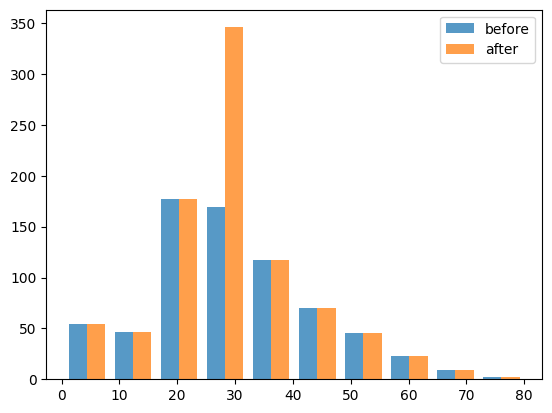

In [19]:
df3 = df2.fillna(df2.age.mean())
df3.isnull().sum()

plt.hist([df2.age, df3.age], alpha = 0.75, label = ['before', 'after'])
plt.legend(loc = 'upper right')
plt.show()

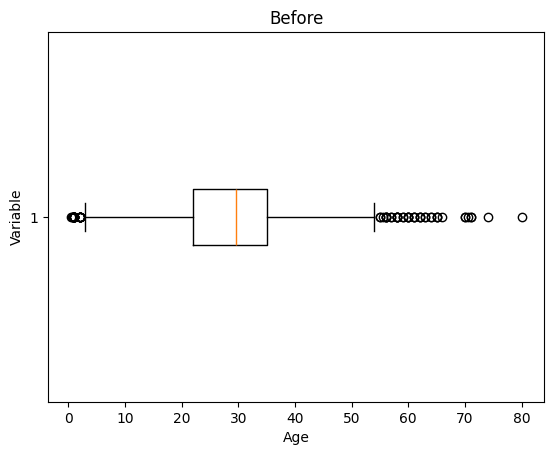

In [20]:
## Handling outliers 
import matplotlib.pyplot as plt 
plt.boxplot(df3['age'], vert = False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Before')
plt.show()

In [22]:
# calculate summary statistics
mean = df3['age'].mean()
std  = df3['age'].std()
 
# Calculate the lower and upper bounds
lower_bound = mean - std*2
upper_bound = mean + std*2
 
print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)
 
# Drop the outliers
df4 = df3[(df3['age'] >= lower_bound)
                & (df3['age'] <= upper_bound)]


Lower Bound : 3.7054001079256587
Upper Bound : 55.57878528533277


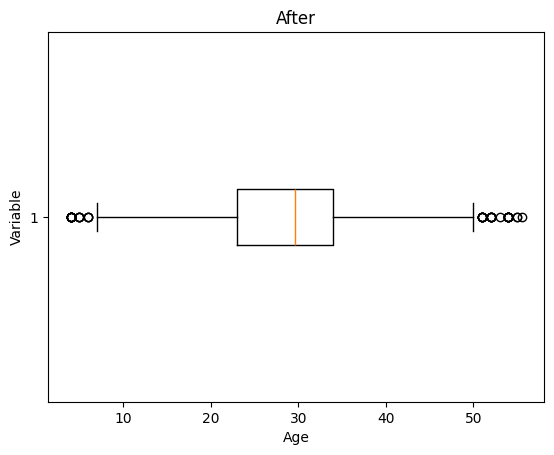

In [23]:
plt.boxplot(df4['age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('After')
plt.show()

In [24]:
## Data Transformation 

X = df3[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
Y = df3['survived']

In [25]:
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [ ]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler(feature_range=(0,1))

num_col = [col for col in X.columns if X[col].d]